## Convert PDF File to Text

In [ ]:
# Import the library and package
import pandas as pd
import numpy as np
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Download and install the nltk data and packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
## Import or install PDF-to-text library
try:
    import PyPDF2
except:
    !pip install PyPDF2
    import PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
# List of PDF files from local folder
file_names = ['required document']

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

## ChatGPT API for Paper Summarization and Text Generation

In [ ]:
# Import the package
try:
    import openai
except:
    !pip install openai
    import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00


In [ ]:
## API Key

API_KEY= "KEY"

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Select the ChatGPT model
model = "gpt-4-0125-preview"

In [ ]:
from openai import OpenAI
client = OpenAI()

### ChatGPT Prompt 1

In [ ]:
prompt1 = 'Here is the relevant transacript of a report which tracking the latest global innovation trends. Base on the USA R&D spendings innovations, which includes Targeted Increase in R&D Spending in Clean Energy and Biotechnology, Whether perceptions of USA people are positive or neutral or negative. : "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt1[:min(len(prompt1),40000)]

'Here is the relevant transacript of a report which tracking the latest global innovation trends. Base on the USA R&D spendings innovations, which includes Targeted Increase in R&D Spending in Clean Energy and Biotechnology, Whether perceptions of USA people are positive or neutral or negative. : "canadian intellectual property office\nhelping make canada a global centre of innovation  \nannual report\n2017—2018\n\nce document est aussi disponible en français sous le titre rapport annuel 2017–2018 : office de la propriété \nintellectuelle du canada – contribuer à faire du canada un centre mondial de l’innovation.\nthis publication is available upon request in accessible formats.\ncontact\nclient service centre\ncanadian intellectual property office\ninnovation, science and economic development canada\nplace du portage i\nroom c229, 2nd floor\n50 victoria street\ngatineau, qc   k1a 0c9\nt elephone (toll-free): 1-866-997-1936 \ntty: 1-866-442-2476\nfax: 819-953-2476\nic.contact-contact.i

In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt1}
  ]
)

In [ ]:
coutput1 = response1.choices[0].message.content
print(coutput1)

Based on the provided documents, the United States is actively focusing on R&D spending in areas of clean energy and biotechnology. These are identified as critical and emerging technologies that are essential for U.S. competitiveness and national security. The government is making efforts to foster innovation through increased R&D funding, as highlighted in the President's fiscal year 2024 budget, which includes historic funding levels for research and development, aimed at over 80 percent of the authorized levels for the Chips and Science Act.

Regarding public perception in the USA, given the proactive approach and investment by the government in these sectors, it is likely that perceptions are positive or at least neutral. The emphasis on innovation in fields such as clean energy suggests a forward-looking stance by the government which is typically well-received by the public, especially when it aligns with concerns about environmental sustainability and job creation in cutting-ed

### ChatGPT Prompt 2

In [ ]:
prompt2 = 'Based on this relevant transacript of a report, for the following three strategies of Targeted Increase in R&D Spending in Clean Energy and Biotechnology, how do the people of the United States perceive and rate them, positively or negatively or neutrally. Do a sentiment analysis of the people and if you are unable to abstract, please give me your own summary and thoughts.: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt2[:min(len(prompt2),40000)]

'Based on this relevant transacript of a report, for the following three strategies of Targeted Increase in R&D Spending in Clean Energy and Biotechnology, how do the people of the United States perceive and rate them, positively or negatively or neutrally. Do a sentiment analysis of the people and if you are unable to abstract, please give me your own summary and thoughts.: "national defense \nscience & technology \nstrategy  2023\nunited states department of defense\n\nnational defense science & technology strategy 20231\nu.s. department of defense\n2023 national defense science and \ntechnology strategy  \nsharpening our competitive edge\n— 2022 national defense strategy“building the future joint force that we need to advance the \ngoals of this strategy requires broad and deep change in how \nwe produce and manage military capability . u.s. competitors \nincreasingly hold at risk our defense ecosystem – the \ndepartment, the defense industrial base, and the landscape \nof private s

In [ ]:
## Call OpenAI API for the second prompt
response2 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt2}
  ]
)

In [ ]:
coutput2 = response2.choices[0].message.content
print(coutput2)

Based on the relevant excerpt from the report on "United States Government National Standards Strategy for Critical and Emerging Technology," the United States perceives and rates the strategies for targeted increase in R&D spending in clean energy and biotechnology positively. This perception is evident through a strategic approach that emphasizes strengthening leadership, competitive engagement in international standards development, and ensuring technological advancements reflect shared values and market competitiveness.

Firstly, the United States identifies the critical role of standards development in global technological leadership and economic prosperity. The strategy outlines a proactive and sustained long-term approach to maintain global leadership in the development of fair and merit-based standards for critical and emerging technologies (CET). This approach is based on principles such as transparency, private and public sector leadership, and broad stakeholder engagement, w

### ChatGPT Prompt 3

In [ ]:
prompt3 = 'Please provide a sentiment analysis of the discussion around R&D spending on clean energy and biotechnology. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to that sentiment. In addition, summarize U.S. behavior and experience with R&D spending strategies. Summarize findings with specific examples and cite documents, or give your own if the document provided does not have these factors: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt3[:min(len(prompt3),40000)]

'Please provide a sentiment analysis of the discussion around R&D spending on clean energy and biotechnology. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to that sentiment. In addition, summarize U.S. behavior and experience with R&D spending strategies. Summarize findings with specific examples and cite documents, or give your own if the document provided does not have these factors: "Based on the provided documents, the United States is actively focusing on R&D spending in areas of clean energy and biotechnology. These are identified as critical and emerging technologies that are essential for U.S. competitiveness and national security. The government is making efforts to foster innovation through increased R&D funding, as highlighted in the President\'s fiscal year 2024 budget, which includes historic funding levels for research and development, aimed at over 80 percent of the authorized levels for the Chips and Science Act.

In [ ]:
## Call OpenAI API for the third prompt
response3 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt3}
  ]
)

In [ ]:
coutput3 = response3.choices[0].message.content
print(coutput3)

Sentiment Analysis:
Discussion about R&D spending in clean energy and biotechnology tends to have a generally positive sentiment. This positive outlook is due to the association of clean energy with environmental sustainability and job creation in a new-age industry, along with the advancements and health improvements attributed to biotechnology research.

Key phrases that contribute to the positive sentiment include:
- "Clean energy" is often linked with reducing carbon emissions and combating climate change, which is a significant global concern.
- "Innovation" and "futuristic," highlighting the progressive nature of the investments and their alignment with modern technological trends.
- "Increased funding" and "historic funding levels" suggest a substantial commitment to the sectors.
- "Competitiveness and national security" are phrases that denote the strategic importance of R&D in these fields.
- "Job creation" in cutting-edge industries is seen as an economic boon.
- "Advancement

### ChatGPT Prompt 4

In [ ]:
prompt4 = 'Please provide a sentiment analysis of the discussion around R&D spending on clean energy and biotechnology. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to that sentiment. In addition, summarize U.K. behavior and experience with R&D spending strategies. Summarize findings with specific examples and cite documents, or give your own if the document provided does not have these factors: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt4[:min(len(prompt4),40000)]

'Please provide a sentiment analysis of the discussion around R&D spending on clean energy and biotechnology. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to that sentiment. In addition, summarize U.K. behavior and experience with R&D spending strategies. Summarize findings with specific examples and cite documents, or give your own if the document provided does not have these factors: "july 2021  \nuk innovation strategy  \nleading the future by creating it  \n\n \n  \n  \n \n  \n \n  \n   \n \n \n \n© crown copyright 2021  \nthis publication is licensed under the terms of the open government licence v3.0 except where otherwise stated. \nto view this licence, visit nationalarchives.gov.uk/doc/open- government -licence/version/3  or write to the \ninformation policy team, the national archives, kew, london tw9 4du, or email: \npsi@nationalarchives.gsi.gov.uk .  \nwhere we have identified any third- party  copyright information y

In [ ]:
## Call OpenAI API for the fourth prompt
response4 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt4}
  ]
)

In [ ]:
coutput4 = response4.choices[0].message.content
print(coutput4)

Based on the documents provided, there is a strong positive sentiment regarding R&D spending on clean energy and biotechnology. The key phrases that contribute to this positive sentiment include:

1. "investment in innovation" - Acknowledges the importance of investing in innovative technologies for future prosperity.
2. "world-leader in science, research and innovation" - Suggests that the UK aims to be at the forefront of global innovation.
3. "green, healthier and more prosperous future" - Indicates a commitment to sustainability and improved well-being.
4. "global hub for innovation" - Emphasizes the desire to create a centralized innovation ecosystem.
5. "increasing annual public investment" - Reflects a proactive approach to funding R&D.
6. "fuelling businesses who want to innovate" - Encourages business-driven innovation.
7. "science superpower" - Aspires to be dominant in scientific research and development.
8. "key seven technology families" - Suggests a strategic focus on cer

### ChatGPT Prompt 5

In [ ]:
prompt5 = 'Distill keywords from the provided text to be used to make a word cloud plot related to clean energy and biotechnology, asking to think about the importance of different keywords from the US vs. UK experience and how important the keywords are when implemented in Canada. Summarize the importance of the different keywords and recommend to me what level of importance to arrange these keywords when making the word cloud plot.: "{input}".'.format(input=combined_processed_text)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt5[:min(len(prompt5),40000)]

'Distill keywords from the provided text to be used to make a word cloud plot related to clean energy and biotechnology, asking to think about the importance of different keywords from the US vs. UK experience and how important the keywords are when implemented in Canada. Summarize the importance of the different keywords and recommend to me what level of importance to arrange these keywords when making the word cloud plot.: "summaries of experience of other countries  – usa \n \nsentiment analysis : \nsentiment analysis of the provided usa materials leads to the conclusion that the \ndiscussion  about r&d spending in clean energy and biotechnology tends to have a \ngenerally positive sentiment. this positive outlook is due to the association of clean \nenergy with environmental sustainability and job creation in a new -age industry, along \nwith the adva ncements and health improvements attributed to biotechnology research.  \n \nkey points  that contribute to the positive sentiment i

In [ ]:
## Call OpenAI API for the last prompt
response5 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt5}
  ]
)

In [ ]:
coutput5 = response5.choices[0].message.content
print(coutput5)

Based on the extensive text provided, here are the distilled keywords and a summary of their importance, guiding their arrangement in a word cloud plot concerning clean energy and biotechnology, especially from the perspectives of the US, UK, and potential implementation in Canada.

### Keywords:
1. Clean Energy
2. Biotechnology
3. R&D Spending
4. Environmental Sustainability
5. Innovation
6. Futuristic
7. Funding Levels
8. Competitiveness
9. National Security
10. Job Creation
11. Healthcare Advancements
12. Carbon Emissions
13. Technological Risks
14. Energy Transition
15. Policy Initiatives
16. Renewable Energy
17. Grid Modernization
18. Energy Efficiency
19. Agriculture Industry
20. Technological Leadership
21. GHG Reduction (Greenhouse Gas)
22. SR&ED Program (Canada)
23. Economic Growth
24. Global Collaboration
25. Sustainability Efforts

### Summary and Importance for Word Cloud Plot:
- **Primary Focus**: "Clean Energy" and "Biotechnology" are central to the discussion, reflecting

### Code for model visualization:

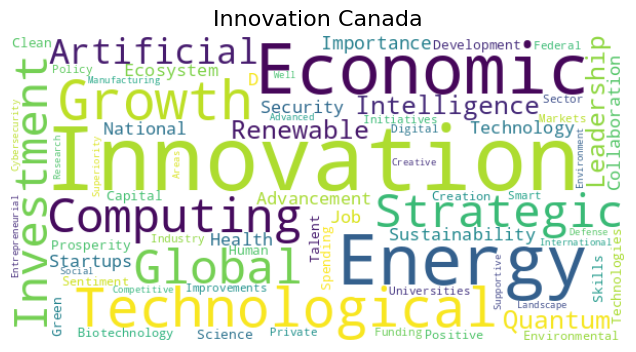

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the key phrases for each sub-strategy with capitalized first letters
human_capital_phrases = [
    "Human Capital", "Artificial Intelligence", "Renewable Energy Technologies",
    "Quantum Computing", "Innovation", "Global Leadership", "Strategic Importance",
    "Economic Prosperity", "Technological Leadership", "Sustainability", "Skills Development",
    "Science and Technology Investment", "Green Jobs", "Talent", "Growth"
]

r_d_spending_phrases = [
    "R&D Spending", "Clean Energy", "Biotechnology", "Positive Sentiment",
    "Environmental Sustainability", "Job Creation", "Advancements", "Health Improvements",
    "Federal Funding", "Private Sector Investment", "Policy Initiatives", "Innovation",
    "Global Energy Markets", "Economic Growth", "Strategic Importance"
]

collaboration_phrases = [
    "Collaboration", "Universities", "Industry", "Digital Health", "Smart Manufacturing",
    "Innovation Ecosystem", "Startups", "Technological Innovation", "National Security",
    "Economic Growth", "Strategic Technology Investments", "International Research Collaborations",
    "Defense Innovation Landscape", "Cybersecurity", "Advanced Computing"
]

entrepreneurial_ecosystem_phrases = [
    "Entrepreneurial Ecosystem", "Technological Areas", "Artificial Intelligence",
    "Renewable Energy", "Quantum Computing", "Startups", "Innovation", "Technological Advancement",
    "National Security", "Economic Growth", "Social Well-being", "R&D", "Creative Innovation",
    "Global Competitive Superiority", "Supportive Environment"
]

# Combine all phrases into one list
all_phrases = human_capital_phrases + r_d_spending_phrases + collaboration_phrases + entrepreneurial_ecosystem_phrases

# Convert the list to a string
all_text = ' '.join(all_phrases)

# Generate word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Innovation Canada", fontsize=16)
plt.axis('off')
plt.show()
